<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Fundamentos de Aprendizado de Máquina
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Teoria;</li>
  <li>Atributos categóricos;</li>
  <li>Atributos numéricos;</li>
  <li>Dados faltantes.</li>
</ol>

---

# **Aulas**

## 0\. Abordagens estatísticas

*   **Descritiva**: foco no passado para entender o **presente**.
*   <font color='red'>**Preditiva**</font>: foca no passado para inferir o **futuro**.

## 1\. Teoria

### **1.1. Motivação** 

Você trabalha em um time da NBA e precisa entender a relação entre o peso e altura dos jogadores da liga para ajudar o seu time a otimizar a condição física dos seus jogadores. O objetivo é responder a seguinte pergunta:

> Dado a **altura** de um jogador, qual deve ser seu **peso**?

- **Dados**

In [1]:
%%writefile nba.csv
height;weight;wage
2.01;86.2;17150000
1.93;106.1;898310
2.11;120.2;9881598
1.88;85.7;15643750
1.88;84.8;2875000
2.11;106.1;2376840
1.98;86.6;2625717
2.08;104.3;37199000
2.03;117.9;28942830
1.83;81.6;522738

Writing nba.csv


 - **Análise Exploratória**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
nba_df = pd.read_csv('nba.csv', sep=';')
nba_df.head()

In [ ]:
nba_df.head().mean()

In [8]:
np.corrcoef(nba_df['weight'], nba_df['height'])

array([[1.        , 0.73782414],
       [0.73782414, 1.        ]])

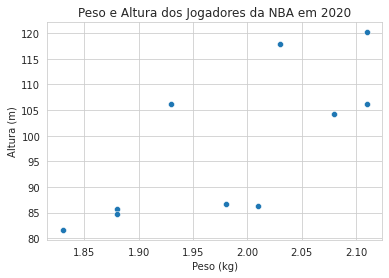

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(x=nba_df['height'], y=nba_df['weight'])
  grafico.set(title='Peso e Altura dos Jogadores da NBA em 2020', xlabel='Peso (kg)', ylabel='Altura (m)');

 - **Análise Preditiva**

> Dado a **altura** de um jogador, qual deve ser seu **peso**?

Queremos uma equação matemática que represente esta relação. Uma possível equação seria a equação linear de primero grau:

 > $y = f(x) = \textbf{a}x + \textbf{b}$

O número $\textbf{a}$ é chamado de coeficiente angular e controla a inclinação da reta, já o número $\textbf{b}$ é chamado de coeficiente linear e indica o deslocamento horizontal da reta. A idéia é predizer o peso que um atleta deve ter dado a sua altura, ou seja:

 > $peso = f(altura) = \textbf{a}(altura) + \textbf{b}$

Qual o melhor valor de $\textbf{a}$ e $\textbf{b}$ para esse conjunto de dados?

### **1.2. Aprendizado de Máquina** 

O aprendizado de máquina é uma área que busca treinar modelos **matemáticos** preditivos utilizando dados e técnicas **estatísticas** e **computacionais**. Por treinar, entenda, selecionar os melhores parâmetros (ou coeficientes) de uma equação matemática para o conjunto de dados em questão. No exemplo da motivação, utilizariamos técnicas de aprendizado de máquina para definir os coeficientes $\textbf{a}$ e $\textbf{b}$ da equação para os dados de peso e altura.

O treino de um modelo (geralmente) segue os seguintes passos:

 1. **Preparação:**
  - Seleção da equação para o problema (modelo);
  - Seleção dos dados disponíveis (atributos);
  - Separação dos dados em treino e validação.
 1. **Treino:**
  - Treino do modelo com os dados de treino (algoritmo);
  - Validação do modelo com os dados de validação (métricas).
 1. **Predição.**

Para o exemplo da motivação:

 1. **Preparação:**
  - $y = f(x) = \textbf{a}x + \textbf{b}$;
  - Peso e altura;
  - Separação em dos dados em treino e validação.
 1. **Treino:**
  - Algoritmo;
  - Métricas.
 1. **Predição.**

### **1.3. Tipos de Aprendizado** 

O tipo de aprendizado se dá pelo dado disponível e pelo tipo da resposta esperada da predição.

Se existe uma variável resposta, ou seja, uma atributo a ser predito, então temos o **aprendizado supervisionado**. Dentro deste aprendizado, se a predição é numérica, temos uma **regressão**, já se está for um conjunto de opções (que podem ser numéricas) temos uma **classificação**. 

> **Exemplo**: Predizer o score de crédito (980, 730, etc.) dado o salário e o gasto mensal médio de cartão de crédito, temos é uma **regressão**.

> **Exemplo**: Predizer a categoria do *score* de crédito (A, B, C, etc.) dado o salário e o gasto mensal médio de cartão de crédito, temos é uma **classificação**.

Se não existe uma variável resposta, ou seja, uma atributo a ser predito, então temos o **aprendizado não supervisionado**. Dentro deste aprendizado, se a predição busca agrupar elementos comuns, temos um **agrupamento**.

> **Exemplo**: Encontrar clientes com perfil de consumo em comum dado o salário e o gasto mensal médio de cartão de crédito, temos é uma **agrupamento**.

## 2\. Atributos categóricos

### **2.1. Definição** 

Atributos categóricos são aqueles que apresentam valores discretos numéricos (`int`, `float`, etc.) ou não (`strings`) para representar categorias. Como os modelos trabalham (em sua grande maioria) apenas com valores numéricos, os atributos com valores do tipo `strings` precisam passar por um processo de codificação ou conversão para valores numéricos.

- Exemplos: sexo, perguntas de sim/não, cidade/estado/país, etc.

### **2.2. Exemplo** 

Nesta aula, vamos utilizar dados sobre provas de vestibular, similar ao nosso ENEM. O conjunto de dados é uma amostra dos dados de uma base de dados do Kaggle, presente neste [link](https://www.kaggle.com/sonukumari47/students-performance-in-exams).

In [9]:
%%writefile exam.csv
ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex
group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
group C,some college,standard,completed,0.69,0.9,0.88,F
group B,master's degree,standard,none,0.9,0.95,0.93,F
group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
group C,some college,standard,none,0.76,0.78,0.75,M
group B,associate's degree,standard,none,0.71,0.83,0.78,F
group B,some college,standard,completed,0.88,0.95,0.92,F
group B,some college,free/reduced,none,0.4,0.43,0.39,M
group D,high school,free/reduced,completed,0.64,0.64,0.67,M
group B,high school,free/reduced,none,0.38,0.6,0.5,F
group C,associate's degree,standard,none,0.58,0.54,0.52,M
group D,associate's degree,standard,none,0.4,0.52,0.43,M
group B,high school,standard,none,0.65,0.81,0.73,F
group A,some college,standard,completed,0.78,0.72,0.7,M
group A,master's degree,standard,none,0.5,0.53,0.58,F
group C,some high school,standard,none,0.69,0.75,0.78,F
group C,high school,standard,none,0.88,0.89,0.86,M
group B,some high school,free/reduced,none,0.18,0.32,0.28,F
group C,master's degree,free/reduced,completed,0.46,0.42,0.46,M
group C,associate's degree,free/reduced,none,0.54,0.58,0.61,F
group D,high school,standard,none,0.66,0.69,0.63,M

Writing exam.csv


In [10]:
data = pd.read_csv('exam.csv')

In [11]:
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


### **2.3. Nominal** 

Atributos categóricos nominais são aqueles em que os valores **não apresentem relação de ordem**. As operações matemáticas definidas sobre estes atributos são as de igualdade e diferença. Assim a sua codificação ou conversão para valores quantitativos **não deve inserir uma ordem**. No exemplo, as seguintes colunas são categóricas nominais: 

In [10]:
data[['ethnicity', 'lunch', 'sex']].head()

,ethnicity,lunch,sex
0,group B,standard,F
1,group C,standard,F
2,group B,standard,F
3,group A,free/reduced,M
4,group C,standard,M


A técnica de codificação mais utilizada é a chamada **one hot encoding** em que as categorias de uma coluna são transformadas em colunas de zeros e uns. Exemplo para a coluna **sex**:

In [11]:
data['sex_m'] = data['sex'].apply(lambda sex: 1 if sex == 'M' else 0)
data['sex_f'] = data['sex'].apply(lambda sex: 1 if sex == 'F' else 0)

In [12]:
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex,sex_m,sex_f
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0
4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0


### **2.4. Ordinal** 

Atributos categóricos ordinais são aqueles em que os valores **apresentem relação de ordem**. As operações definidas sobre estes atributos são as de igualdade/diferença e maior/menor. Assim a sua codificação ou conversão para valores quantitativos **deve manter a ordem**. No exemplo, as seguintes colunas são categóricas ordinais: 

In [13]:
data[['parental_education', 'preparation_course']].head()

,parental_education,preparation_course
0,bachelor's degree,none
1,some college,completed
2,master's degree,none
3,associate's degree,none
4,some college,none


A técnica de codificação mais utilizada é aquele em que transformamos cada categoria da coluna em um número inteiro, mantendo a ordem. Exemplo para a coluna **parental level of education**:

In [14]:
data['parental_education'].drop_duplicates()

0      bachelor's degree
1           some college
2        master's degree
3     associate's degree
8            high school
15      some high school
Name: parental_education, dtype: object

In [15]:
parental_education_mapper = {
    "master's degree": 6,
    "bachelor's degree": 5,
    "associate's degree": 4,
    "some college": 3,
    "high school": 2,
    "some high school": 1,
}

In [16]:
data['parental_education_encoded'] = data['parental_education'].apply(lambda level: parental_education_mapper[level])

In [ ]:
data.head()

## 3\. Atributos numéricos

### **3.1. Definição** 

Atributos numéricos são aqueles que apresentam valores discretos (`int`) ou contínuos (`float`) para representar quantidades. Em geral modelos trabalham melhor com dados com escalas reduzidas, ou seja, a escala do atributo é transformada para o intervalo entre $[-1, 1]$, $[0, 1]$, etc.




- Exemplos: idade, salário, altura, peso, etc.

### **3.2. Exemplo** 

Vamos continuar a utilizar dados sobre provas de vestibular, similar ao nosso ENEM, da aula passada.

In [17]:
data.head()

,ethnicity,parental_education,lunch,preparation_course,math,reading,writing,sex,sex_m,sex_f,parental_education_encoded
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F,0,1,5
1,group C,some college,standard,completed,0.69,0.90,0.88,F,0,1,3
2,group B,master's degree,standard,none,0.90,0.95,0.93,F,0,1,6
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M,1,0,4
4,group C,some college,standard,none,0.76,0.78,0.75,M,1,0,3


In [18]:
data[['math', 'reading', 'writing']].head()

,math,reading,writing
0,0.72,0.72,0.74
1,0.69,0.90,0.88
2,0.90,0.95,0.93
3,0.47,0.57,0.44
4,0.76,0.78,0.75


### **3.3. Escala** 

 - **Normalização** 

A normalização reduz a **escala** do atributo para o intervalo de $[0, 1]$. Útil quando diferentes atributos possuem escalas muito diferentes, como idade e salário. Contudo, a presença de *outliers* pode afetar os resultados.

> $x' = \frac{x - x_{min}}{x_{max} - x_{min}}$

Exemplo para a coluna **math**:

In [19]:
min = data['math'].min()
print(min)

max = data['math'].max()
print(max)

0.18
0.9


In [20]:
data['math_norm'] = data['math'].apply(lambda grade: (grade - min) / (max - min))

In [ ]:
data.head()

In [22]:
min = data['math_norm'].min()
print(min)

max = data['math_norm'].max()
print(max)

0.0
1.0


 - **Padronização**

A padronização altera a **média** ($x_{m}$) e o **desvio padrão** ($\sigma$) do atributo para $0$ e $1$, respectivamente. Também é útil quando diferentes atributos possuem escalas muito diferentes, como idade e salário. E conserva a presença de *outliers* por não apresentar um limite inferior e superior.

> $x' = \frac{x - x_{m}}{\sigma}$

Exemplo para a coluna **math**:

In [ ]:
media = data['math'].mean()
print(media)

desvio_padrao = data['math'].std()
print(desvio_padrao)

In [25]:
data['math_padr'] = data['math'].apply(lambda nota: (nota - media) / desvio_padrao)

In [ ]:
data.head()

In [27]:
media = data['math_padr'].mean()
print(media)

desvio_padrao = data['math_padr'].std()
print(desvio_padrao)

-1.2688263138573217e-16
1.0


## 4\. Dados faltantes

A maioria dos modelos de aprendizado de máquina não estão preparados para lidar com dados faltantes, estes devem ser tratados de acordo com o tipo do atributo.

### **4.1. Técnicas** 

 - Atributo como variável resposta: descartar;
 - Atributo categórico: descartar;
 - Atributo numérico: descartar ou preenchar com a média/mediana.

### **4.2. Outros problemas** 

 - Dados redundantes: descartar;
 - Dados desbalanceados: pesos;
 - *Outliers*: descartar (caso seja não relevante);
 - Etc.